# Lost in Translation
## Classifying Speech Language using Deep Learning

### Part 4 - Tensorflow

#### Import library

In [27]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import IPython.display as ipd
import librosa
import librosa.display
from scipy.io import wavfile

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten

#### Load data

In [2]:
df = pd.read_pickle('df_all.pkl')

In [3]:
df

,features,label
0,"[-328.1553, 33.20999, -14.629965, 25.129225, -...",chinese
1,"[-317.4969, 33.81309, -23.309122, 31.999235, -...",chinese
2,"[-336.15854, 35.530407, -25.493, 18.644785, -2...",chinese
3,"[-333.79565, 31.953947, -13.206911, 22.866724,...",chinese
4,"[-354.22464, 45.220486, -17.17353, 27.299313, ...",chinese
...,...,...
64288,"[-351.8527, 107.06704, -3.2553566, 47.231853, ...",spanish
64289,"[-367.3681, 112.8195, -10.63875, 28.11285, 0.3...",spanish
64290,"[-359.3411, 113.6945, -2.7332597, 25.764277, 2...",spanish
64291,"[-327.3389, 131.14326, -6.5025754, 38.206024, ...",spanish


#### Get feature matrix

In [4]:
# use label encoder to convert the language labels to numeric target column
encoder = LabelEncoder()
encoder.fit(df['label'])
labels = encoder.classes_
y = encoder.transform(df['label'])

In [5]:
# Convert feature matrix into a keras-friendly format
X = np.array(df['features'].tolist())

#### Train_test split

In [6]:
seed = 99
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1, random_state = seed, shuffle = True)

#### Build a CNN

In [7]:
# reshape the input into "images"
X_train = X_train.reshape(X_train.shape[0], 10, 4, 1)
X_test = X_test.reshape(X_test.shape[0], 10, 4, 1)

In [8]:
# Check the shape of the inputs and outputs
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(57863, 10, 4, 1)
(6430, 10, 4, 1)
(57863,)
(6430,)


In [9]:
y_train

array([8, 8, 8, ..., 8, 4, 4])

In [10]:
model = Sequential()
model.add(Flatten(input_shape=(10, 4)))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, verbose=1)

Epoch 1/10
1809/1809 [==============================] - 2s 931us/step - loss: 4.1273 - accuracy: 0.8560
Epoch 2/10
1809/1809 [==============================] - 2s 928us/step - loss: 0.0339 - accuracy: 0.9911
Epoch 3/10
1809/1809 [==============================] - 2s 930us/step - loss: 0.0115 - accuracy: 0.9963
Epoch 4/10
1809/1809 [==============================] - 2s 929us/step - loss: 0.0072 - accuracy: 0.9979
Epoch 5/10
1809/1809 [==============================] - 2s 931us/step - loss: 0.0051 - accuracy: 0.9985
Epoch 6/10
1809/1809 [==============================] - 2s 929us/step - loss: 0.0049 - accuracy: 0.9985
Epoch 7/10
1809/1809 [==============================] - 2s 931us/step - loss: 0.0030 - accuracy: 0.9990
Epoch 8/10
1809/1809 [==============================] - 2s 931us/step - loss: 0.0030 - accuracy: 0.9991
Epoch 9/10
1809/1809 [==============================] - 2s 933us/step - loss: 0.0025 - accuracy: 0.9991
Epoch 10/10
1809/1809 [==============================] - 2s 933u

In [11]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print('\nTest accuracy {:5.2f}%'.format(100*test_acc))

201/201 [==============================] - 0s 881us/step - loss: 0.0035 - accuracy: 0.9992

Test accuracy 99.92%


In [12]:
# model.save('../saved_model/20200602/') 

#### Check per class accuracy

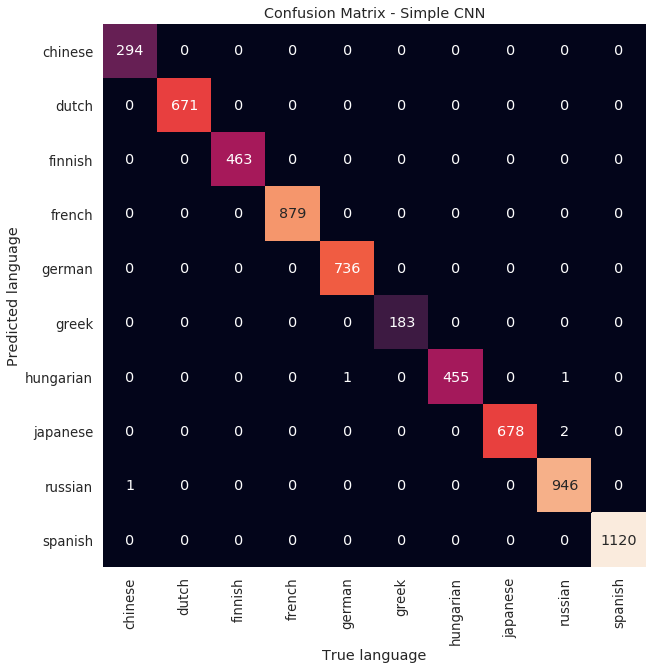

In [32]:
y_pred = np.argmax(model.predict(X_test),axis=1)
mat = confusion_matrix(y_test, y_pred)

fig, axs = plt.subplots(figsize=(10,10))
sns.heatmap(
    mat.T, square=True, annot=True, fmt='d', cbar=False,
    xticklabels=labels,
    yticklabels=labels,
    ax = axs)
sns.set(font_scale=1.2)
axs.set_title('Confusion Matrix - Simple CNN')
axs.set_xlabel('True language')
axs.set_ylabel('Predicted language');

# Prediction test using personal recording

In [13]:
import os
import numpy as np
import pandas as pd
import IPython.display as ipd
import librosa
import librosa.display
from scipy.io import wavfile

def extract_features(file_name):
    try:
        audio, sample_rate = librosa.load(file_name) 
        X = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        X_scaled = np.mean(X.T,axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        return None
     
    return X_scaled

In [14]:
sample_path = '../test/test2.wav'
ipd.Audio(sample_path)

In [15]:
test_case = extract_features('../test/test2.wav')
test_case = test_case.reshape(1, 10, 4, 1)

In [16]:
predicted = np.argmax(model.predict(test_case))
print(labels[predicted])

finnish
